In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.rcParams.update({'font.size': 7})
from helper_functions import *

## Fetch parameters

In [2]:
parname = 'param_base'
param = np.load('mf_parameter_files/%s.npy'%parname)

taume, taump, taums, taumv, sigma_e, sigma_p, sigma_s, sigma_v,\
           j_ee, j_ep, j_es, j_ev, j_pe, j_pp, j_ps, j_pv, j_se, j_sp, j_ss, j_sv, j_ve, j_vp, j_vs, j_vv,\
           q_e, q_p, q_s, q_v, epsilon, \
           kbar_ee, kbar_ep, kbar_es,kbar_ev,\
           kbar_pe, kbar_pp, kbar_ps, kbar_pv,\
           kbar_se, kbar_sp, kbar_ss, kbar_sv,\
           kbar_ve, kbar_vp, kbar_vs, kbar_vv,\
           sigma_o, p_e, p_p, p_s, p_v, jbar_e, jbar_p, jbar_s, jbar_v = param

# constants
Vth = 1
Vre = 0
Vlb = -1
EL = 0.

Cme = 1
gLe = Cme / taume
Cmp = 1
gLp = Cmp / taump
Cms = 1
gLs = Cms / taums
Cmv = 1
gLv = Cmv / taumv
print(taume,taump,taums, taumv)

dv0 = 0.01
vs = np.arange(Vlb, Vth, dv0)

# spatial resolution
x_res = 0.005
xpoints = int(1/x_res)

# projections
x, proj_e = wrapped_gaussian(0., sigma_e, npoints=2, xpoints=xpoints, xleft=0, xright=1)
x, proj_p = wrapped_gaussian(0., sigma_p, npoints=2, xpoints=xpoints, xleft=0, xright=1)
x, proj_s = wrapped_gaussian(0., sigma_s, npoints=2, xpoints=xpoints, xleft=0, xright=1)
x, proj_v = wrapped_gaussian(0., sigma_v, npoints=2, xpoints=xpoints, xleft=0, xright=1)

# synaptic weights
j_mat = np.array([[j_ee, j_ep, j_es, j_ev], [ j_pe, j_pp, j_ps, j_pv], [j_se, j_sp, j_ss, j_sv], [j_ve, j_vp, j_vs, j_vv]])
q_mat = np.array([[q_e, q_p, q_s, q_v] for _ in range(4)])


# connection probabilities
kbar_mat = np.array([[kbar_ee, kbar_ep, kbar_es, kbar_ev], [ kbar_pe, kbar_pp, kbar_ps, kbar_pv],
                     [kbar_se, kbar_sp, kbar_ss, kbar_sv], [kbar_ve, kbar_vp, kbar_vs, kbar_vv]])

wbar_mat = q_mat * j_mat * kbar_mat
wbar_ee = wbar_mat[0,0]
wbar_ep = wbar_mat[0,1]
wbar_es = wbar_mat[0,2]
wbar_ev = wbar_mat[0,3]
wbar_pe = wbar_mat[1,0]
wbar_pp = wbar_mat[1,1]
wbar_ps = wbar_mat[1,2]
wbar_pv = wbar_mat[1,3]
wbar_se = wbar_mat[2,0]
wbar_sp = wbar_mat[2,1]
wbar_ss = wbar_mat[2,2]
wbar_sv = wbar_mat[2,3]
wbar_ve = wbar_mat[3,0]
wbar_vp = wbar_mat[3,1]
wbar_vs = wbar_mat[3,2]
wbar_vv = wbar_mat[3,3]

#external inputs
_, j_e = wrapped_gaussian(0.5, sigma_o, npoints=2, xpoints=xpoints, xleft=0, xright=1)
_, j_p = wrapped_gaussian(0.5, sigma_o, npoints=2, xpoints=xpoints, xleft=0, xright=1)
_, j_s = wrapped_gaussian(0.5, sigma_o, npoints=2, xpoints=xpoints, xleft=0, xright=1)
_, j_v = wrapped_gaussian(0.5, sigma_o, npoints=2, xpoints=xpoints, xleft=0, xright=1)

j_e = p_e*jbar_e*j_e + (1-p_e)*jbar_e
j_p = p_p*jbar_p*j_p + (1-p_p)*jbar_p
j_s = p_s*jbar_s*j_s + (1-p_s)*jbar_s
j_v = p_v*jbar_v*j_v + (1-p_v)*jbar_v

30.0 20.0 20.0 20.0


## Compute Balanced Solutions

In [4]:
p = np.array([p_e, p_p, p_s, p_v])
kbar_mat = np.array([[kbar_ee, kbar_ep, kbar_es, kbar_ev], [ kbar_pe, kbar_pp, kbar_ps, kbar_pv],
                         [kbar_se, kbar_sp, kbar_ss, kbar_sv], [kbar_ve, kbar_vp, kbar_vs, kbar_vv]])
j_mat = np.array([[j_ee, -j_ep, -j_es, -j_ev], [ j_pe, -j_pp, -j_ps, -j_pv], 
                  [j_se, -j_sp, -j_ss, -j_sv], [j_ve, -j_vp, -j_vs, -j_vv]])
q_mat = np.array([[q_e, q_p, q_s, q_v] for _ in range(4)])

wbar_mat = q_mat * j_mat * kbar_mat

detW = - np.linalg.det(wbar_mat)
cofac = cofactor_matrix(wbar_mat)
fbar = np.array([jbar_e, jbar_p, jbar_s,jbar_v])

# Gaussian-structured component
ww = p*fbar*cofac.T/detW
nu_bar_g = np.sum(ww,axis=1)
nu_bar_e_g, nu_bar_p_g, nu_bar_s_g, nu_bar_v_g = nu_bar_g

# Flat component
ww = (1 - p)*fbar*cofac.T/detW
nu_bar_f = np.sum(ww,axis=1)
nu_bar_e_f, nu_bar_p_f, nu_bar_s_f, nu_bar_v_f = nu_bar_f

# spatial resolution
x_res = 0.005
xpoints = int(1/x_res)

_, gg_e = wrapped_gaussian(0.5, np.sqrt(sigma_o**2 - sigma_e**2), npoints=2, xpoints=xpoints, xleft=0, xright=1)
_, gg_p = wrapped_gaussian(0.5, np.sqrt(sigma_o**2 - sigma_p**2), npoints=2, xpoints=xpoints, xleft=0, xright=1)
_, gg_s = wrapped_gaussian(0.5, np.sqrt(sigma_o**2 - sigma_s**2), npoints=2, xpoints=xpoints, xleft=0, xright=1)
_, gg_v = wrapped_gaussian(0.5, np.sqrt(sigma_o**2 - sigma_v**2), npoints=2, xpoints=xpoints, xleft=0, xright=1)


nu_e_balanced = nu_bar_e_g * gg_e + nu_bar_e_f
nu_p_balanced = nu_bar_p_g * gg_p + nu_bar_p_f
nu_s_balanced = nu_bar_s_g * gg_s + nu_bar_s_f
nu_v_balanced = nu_bar_v_g * gg_v + nu_bar_v_f

### Fetch Simulation results

In [8]:
import scipy.io
import pickle
N=300000
seedlist = [i for i in range(1,21)]
# N= 40000
erates,prates,srates,vrates = [[] for _ in range(4)]
for seed in seedlist:
    mat = scipy.io.loadmat('sim_results/%s/frates_%d_seed_%d.mat'%(parname,N,seed))
    rates = mat['frates']
    erates.append(rates[0,:])
    prates.append(rates[1,:])
    srates.append(rates[2,:])
    vrates.append(rates[3,:])

with open(f'mf_results/{parname}/N_{int(N)}.pkl','rb') as f:
    x, nu_e, nu_p, nu_s, nu_v = pickle.load(f)

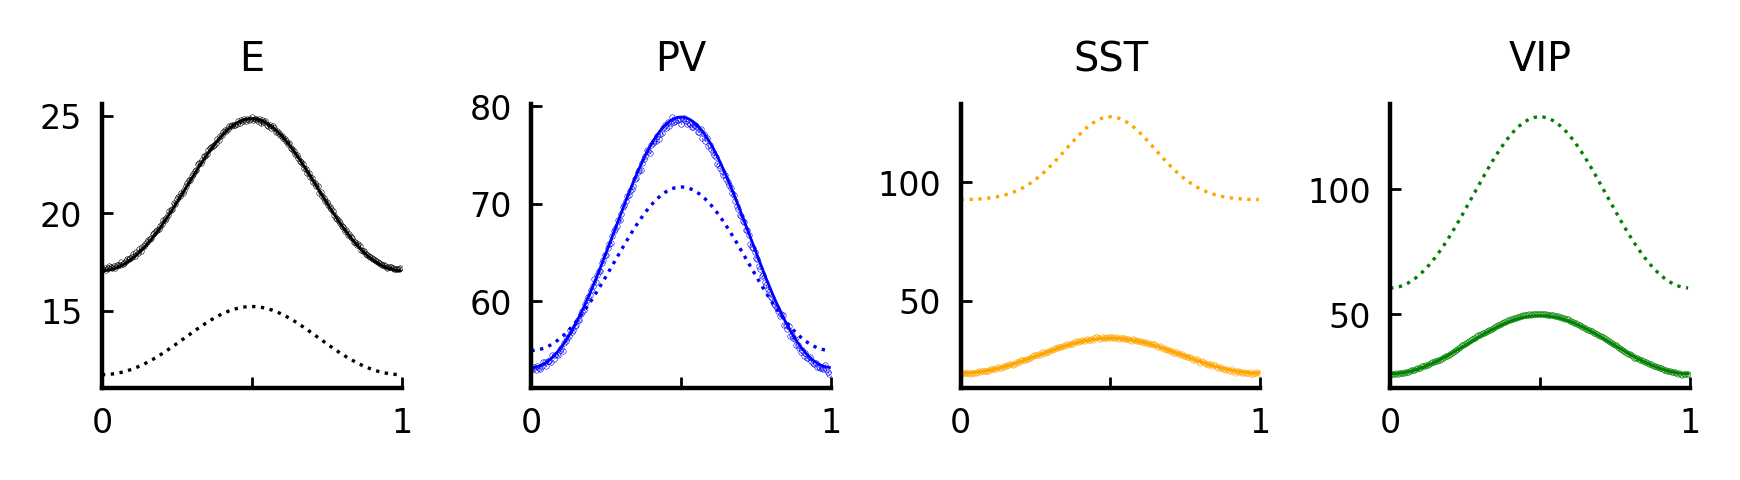

In [10]:
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams.update({'font.size': 6})
rates = [erates,prates,srates,vrates]
mfs = [nu_e*1000, nu_p*1000, nu_s*1000, nu_v*1000]
bals = [nu_e_balanced*1000, nu_p_balanced*1000, nu_s_balanced*1000, nu_v_balanced*1000]
colors = ['black','blue','orange','green']
fig, axes = plt.subplots(1,4,figsize=(110/25.4, 30/25.4),dpi=400)
x = np.arange(0,1,0.005)
for popi in range(4):
    ax = axes[popi]
    rate = rates[popi]
    col = colors[popi]
    popname = ['E', 'PV', 'SST', 'VIP'][popi]
#     ax.scatter(x,np.mean(rate, axis=0), c=col, s=0.1)

    ax.errorbar(x, np.mean(rate, axis=0), fmt = '.', markersize=0.2, yerr = scipy.stats.sem(erates, axis=0), c=col, linestyle='None', elinewidth=0.2, label='Simulation')
    ax.plot(x,mfs[popi],  c=col, lw = 0.5, label='Mean Field')
    ax.plot(x,bals[popi], ':', c=col, lw=0.6, label='Balanced')
    
#     ax.set_xlabel('position')
    ax.set_xlim(0,1)
    ax.set_xticks([0,0.5,1])
    ax.set_xticklabels([0,'',1])
    ax.set_title(f'{popname}')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(which='both',direction='in', length=2, width=0.5)
#     ax.legend()
plt.tight_layout()

plt.savefig('figs/Fig2a.svg')
plt.show()

## Error calculation

In [20]:
import scipy
import scipy.stats
import pickle
import numpy as np

errors = []
sems = []
xx = []
Nlist = [20000*i for i in range(1,36)] 
erates, prates, srates, vrates = [], [], [], []
for N in Nlist:
    
    if N>370000: break
    
    seedlist = [i for i in range(1,21)]
    
    errs = []
    
    try:
        with open(f'mf_results/{parname}/N_{int(N)}.pkl','rb') as f:
            x, nu_e, nu_p, nu_s, nu_v = pickle.load(f)
    except FileNotFoundError:
        continue

    nu_e = nu_e
    nu_p = nu_p
    nu_s = nu_s
    nu_v = nu_v

    for seed in seedlist:
        mat = scipy.io.loadmat('sim_results/%s/frates_%d_seed_%d.mat'%(parname,N,seed))
        rates = mat['frates']
        erates =rates[0,:]/1000
        prates = rates[1,:]/1000
        srates = rates[2,:]/1000
        vrates = rates[3,:]/1000
    
        err = 0
        err += np.mean(np.square(nu_e - erates))
        err += np.mean(np.square(nu_p - prates))
        err += np.mean(np.square(nu_s - srates))
        err += np.mean(np.square(nu_v - vrates))
        err = err/4
        err = err/np.mean(np.concatenate([nu_e,nu_p,nu_s,nu_v]))
        err = err
        print(N, seed, err)
        errs.append(err)
    
    errors.append(np.mean(errs))
    sems.append(scipy.stats.sem(errs))
    xx.append(N)

60000 1 5.4365378295395726e-05
60000 2 4.980010909255878e-05
60000 3 5.559622182044289e-05
60000 4 5.1110331628995874e-05
60000 5 5.554033452606732e-05
60000 6 4.916101318707414e-05
60000 7 6.431756754127193e-05
60000 8 5.42086790139181e-05
60000 9 5.339392673066389e-05
60000 10 5.400038221184124e-05
60000 11 5.575458297465445e-05
60000 12 4.769888235361755e-05
60000 13 4.9343321201823594e-05
60000 14 5.4544288857224156e-05
60000 15 4.663665338052968e-05
60000 16 4.868679256231355e-05
60000 17 4.549982555472781e-05
60000 18 5.062162104027897e-05
60000 19 4.979527895101616e-05
60000 20 5.5528097015813705e-05
80000 1 4.9089412279913765e-05
80000 2 5.8597610985861603e-05
80000 3 4.718748818589412e-05
80000 4 5.435088326498147e-05
80000 5 4.6972425557907256e-05
80000 6 5.519741274798298e-05
80000 7 5.661848222426135e-05
80000 8 5.143578872931361e-05
80000 9 5.5244816015809444e-05
80000 10 5.047584778462909e-05
80000 11 5.5667505049801975e-05
80000 12 5.7629231301504215e-05
80000 13 5.55328

320000 13 8.730363954302137e-06
320000 14 9.184754380783554e-06
320000 15 9.245635713488124e-06
320000 16 9.261703678243477e-06
320000 17 1.0860751030483601e-05
320000 18 9.279352523472936e-06
320000 19 1.0239546270560164e-05
320000 20 9.818887189419582e-06
340000 1 7.861068145730513e-06
340000 2 7.86165684549555e-06
340000 3 8.595968750060876e-06
340000 4 9.122666175292117e-06
340000 5 8.456525977537014e-06
340000 6 9.024407954633388e-06
340000 7 8.004543161101725e-06
340000 8 7.658284764048893e-06
340000 9 8.520681206352694e-06
340000 10 8.315550625650555e-06
340000 11 8.685127349171988e-06
340000 12 8.50561412435017e-06
340000 13 7.487734067216225e-06
340000 14 8.396568030960819e-06
340000 15 7.953970130403888e-06
340000 16 8.00761687161459e-06
340000 17 7.96101296508656e-06
340000 18 9.180236660069161e-06
340000 19 8.305463919326099e-06
340000 20 8.812770028277605e-06
360000 1 7.78052071649508e-06
360000 2 8.211272052191421e-06
360000 3 7.461874120485159e-06
360000 4 7.325946747227

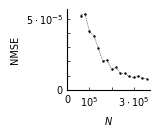

In [21]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams.update({'font.size': 7})
fig, ax = plt.subplots(figsize=(30/25.4, 30/25.4))
plt.scatter(xx,errors,c='black', s=0.5)
plt.errorbar(xx,errors,yerr=sems,linestyle=':', lw = 0.5, color='black')
# plt.title('MF vs Simulations')

ax.set_ylim(0,)
ax.set_xticks([0, 100000, 200000, 300000])
ax.set_xticklabels([r'0',r'$10^5$','',r'$3\cdot 10^5$'])

ax.set_yticks([0,1e-5,2e-5,3e-5,4e-5,5e-5])
ax.set_yticklabels(['0', '', '', '', '', r'$5\cdot 10^{-5}$'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='both',direction='in', length=2, width=0.5)

ax.set_ylabel('NMSE')
ax.set_xlabel(r'$N$')

plt.subplots_adjust(left=0.2, bottom=0.2)

plt.savefig('figs/Fig2b.svg')
plt.show()

In [22]:
import scipy
import scipy.stats
import pickle
errors = []
errors_prev = []
sems = []
xx = []
Nlist = [10000*i for i in range(1,51)] 
Nlist = [10000*i for i in range(1,41)] 
Nlist = [20000*i for i in range(1,21)] 
Nlist = [20000*i for i in range(2,201)]
# Nlist = [20000*i for i in range(1,11)]
for N in Nlist:
    
    seedlist = [42*i for i in range(1,7)]
    
    errs = []
        
    try:
        with open(f'mf_results/{parname}/N_{int(N)}.pkl','rb') as f:
            x, nu_e, nu_p, nu_s, nu_v = pickle.load(f)
    except FileNotFoundError:
        continue

    err = 0
    err += np.mean(np.square(nu_e - nu_e_balanced))
    err += np.mean(np.square(nu_p - nu_p_balanced))
    err += np.mean(np.square(nu_s - nu_s_balanced))
    err += np.mean(np.square(nu_v - nu_v_balanced))
    err = err/4
    err = err/np.mean(np.concatenate([nu_e,nu_p,nu_s,nu_v]))
    errors.append(err)
    
    
    xx.append(N)

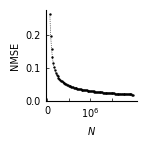

In [25]:
plt.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams.update({'font.size': 7})
fig, ax = plt.subplots(figsize=(30/25.4, 30/25.4))
plt.scatter(xx,errors,c='black', s=0.5)
plt.plot(xx,errors,':', c='black', lw=0.5)

ax.set_xticks([0,500000, 1000000, 1.5e6])
ax.set_xticklabels(['0', '',r'$10^6$', ''])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='both',direction='in', length=2, width=0.5)

# ax.set_xscale('log')

ax.set_ylabel('NMSE')
ax.set_xlabel(r'$N$')
ax.set_ylim(0,)
# plt.yscale('log')
# plt.tight_layout()
plt.savefig('figs/Fig2c.svg')
plt.show()